In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras import datasets

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [6]:
import matplotlib.pyplot as plt

In [7]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

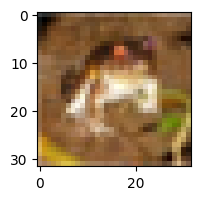

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
plt.show()

In [10]:
#normalizing the. input
X_train= X_train/ 255.0
X_test= X_test/ 255.0

In [11]:
# size of image after conv layer = n-f+1   where n is original size f is the kernel_size here no padding is done
# with padding size is (n+2p-f+1)/s.  s= stride , p=padding

In [12]:
# since we are facing overfitting problem we use regularisation
from tensorflow.keras.regularizers import l2

In [24]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# Size after max pooling (f X f)
If you use "valid" padding (no padding):

New Height (H_out) = (H - F) / stride + 1
New Width (W_out) = (W - F) / stride + 1

In [29]:
#making the cnn
cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same',kernel_regularizer=l2(0.01)),  # Output size: (32, 32, 16)
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # Output size: (16, 16, 16)
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)),  # Output size: (16, 16, 32)
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # Output size: (8, 8, 32)

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),  # Output size: (8, 8, 64)
    MaxPooling2D((2, 2)),  # Output size: (4, 4, 64)

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [34]:
from tensorflow.keras.optimizers import Adagrad

# Create an Adam optimizer with the desired learning rate
opt = Adagrad(learning_rate=0.001)

# Compile the model with the optimizer
cnn.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [35]:
cnn.fit(X_train,Y_train,epochs=100, batch_size=64)

Epoch 1/100
782/782 [==============================] - 6s 5ms/step - loss: 0.4292 - accuracy: 0.8882
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 0.3942 - accuracy: 0.8985
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3860 - accuracy: 0.9023
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3758 - accuracy: 0.9048
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 0.3718 - accuracy: 0.9060
Epoch 6/100
782/782 [==============================] - 4s 6ms/step - loss: 0.3642 - accuracy: 0.9083
Epoch 7/100
782/782 [==============================] - 4s 6ms/step - loss: 0.3612 - accuracy: 0.9082
Epoch 8/100
782/782 [==============================] - 4s 6ms/step - loss: 0.3616 - accuracy: 0.9084
Epoch 9/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3584 - accuracy: 0.9070
Epoch 10/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3499 - accura

In [36]:
cnn.evaluate(X_test, Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 1.0849 - accuracy: 0.7829


[1.0848784446716309, 0.7828999757766724]

# little overfit